# Background

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**Attribute information:**

- age
- sex
- chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl 
    - 1 = true 
    - 0 = false
- resting electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach - maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping 
- number of major vessels (0-3) colored by flourosopy
- thal: 
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect

In [1]:
#Storing variable info doctsring for quick referencing during the project

def var_info():
    """
- age
- sex
- chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl 
    - 1 = true 
    - 0 = false
- resting electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach - maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping 
- number of major vessels (0-3) colored by flourosopy
- thal: 
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect
    """

# Part 1: Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
filename = 'processed.cleveland.data'
data = pd.read_csv(filename,header=None,names=['age','sex','cp','trestbps','chol','fbs','restecg',
                                            'thalach','exang','oldpeak','slope','ca','thal','target'])

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Part 2: Data Pre-processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


There seems to be an outlier in cholesterol since 75th percentile value is 275 and max is around 564. Let's plot a distribution of this variable first

<AxesSubplot:>

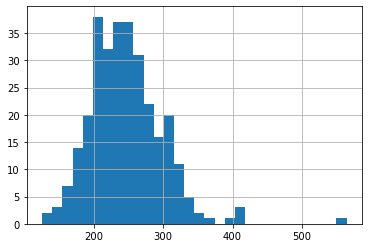

In [7]:
data['chol'].hist(bins=30)

In [8]:
data[data['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


Let us drop this observation as the cholesterol value is an outlier inspite of the patient reporting no heart condition 

In [9]:
data.drop(index=152,axis=0,inplace=True)

<AxesSubplot:>

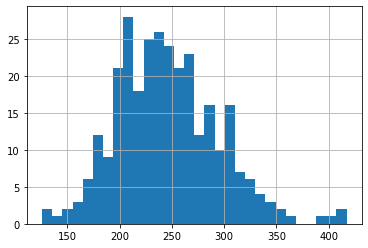

In [10]:
data['chol'].hist(bins=30)

In [11]:
data['target'].value_counts(normalize=True)*100

0    53.973510
1    18.211921
2    11.920530
3    11.589404
4     4.304636
Name: target, dtype: float64

Let us remodel this to a binary classification problem, since all the other classes are significantly smaller and we do not have enough observations to predict it's individual behaviour 

In [12]:
data['target'].replace(to_replace=[2,3,4],value=1,inplace=True)
data['target'].value_counts(normalize=True)*100

0    53.97351
1    46.02649
Name: target, dtype: float64

In [13]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

From our problem statement, we can classify the data types of the variables as follows - 

- Continuous variables - age, trestbps, chol, thalach, oldpeak,
- Nominal variables -  sex, cp, fbs, restecg, exang, slope, ca, thal, target

In [14]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for i in cat_cols:
    data[i] = data[i].apply(lambda x: str(x)) 

In [15]:
num_cols = data.select_dtypes(include='float64').columns.to_list()

In [16]:
print('Categorical variables include:',cat_cols)
print('Numerical variables include:',num_cols)

Categorical variables include: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical variables include: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [17]:
data.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [18]:
for i in cat_cols:
    print('Unique values of',i,'are', list(data[i].unique()))

Unique values of sex are ['1.0', '0.0']
Unique values of cp are ['1.0', '4.0', '3.0', '2.0']
Unique values of fbs are ['1.0', '0.0']
Unique values of restecg are ['2.0', '0.0', '1.0']
Unique values of exang are ['0.0', '1.0']
Unique values of slope are ['3.0', '2.0', '1.0']
Unique values of ca are ['0.0', '3.0', '2.0', '1.0', '?']
Unique values of thal are ['6.0', '3.0', '7.0', '?']
Unique values of target are ['0', '1']


In [19]:
cols = data.columns.to_list()

'ca' and 'thal' have some missing values in the form of question mark. Let us replace this string type in the entire dataset with null values

In [20]:
data.replace('?',np.nan,inplace=True)

In [21]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Since there are only 6 observations with null values, let us drop these rows

In [22]:
data.dropna(axis=0,inplace=True)

In [23]:
print(data.shape)

(296, 14)


After pre-processing, we have dropped 6 observations in total which had outliers and missing values

# Part 3: Exploratory Data Analysis (EDA)

This section is split into 2 parts where visualisations are bifurcated depending on the variable type - numeric and categorical

## Numeric Variables

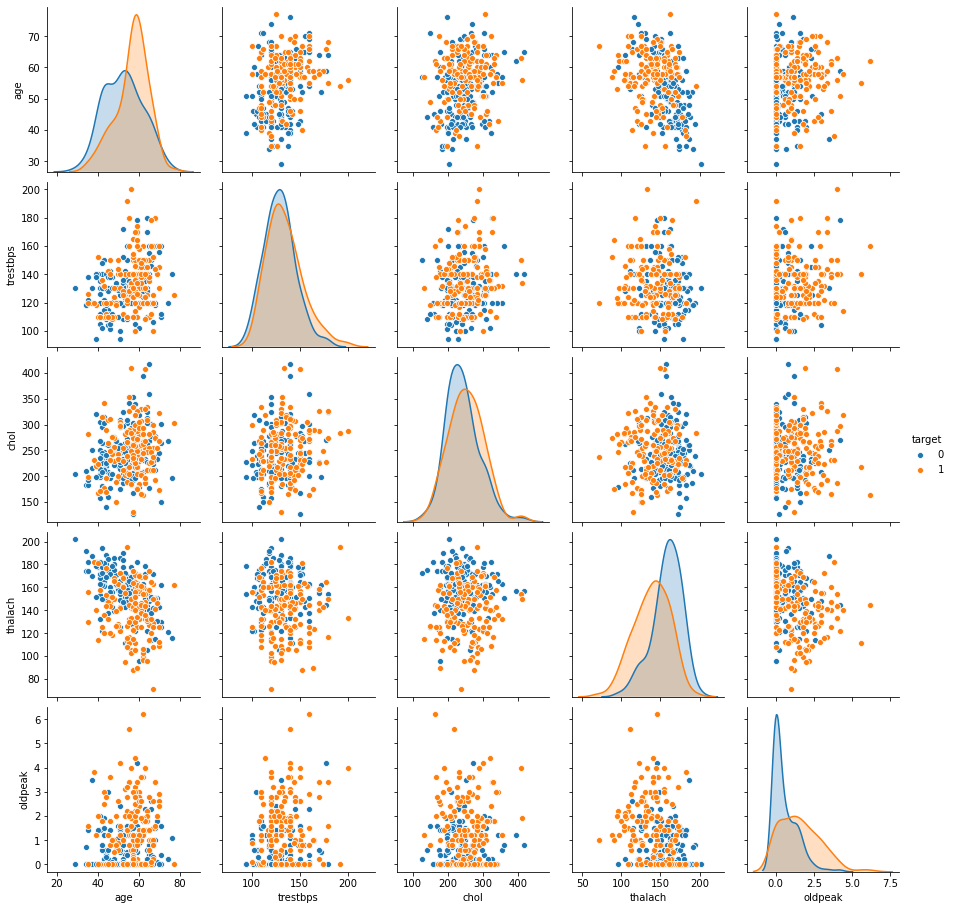

In [24]:
num_cols.append('target')
sns.pairplot(data[num_cols],hue='target')
num_cols.remove('target')

In [25]:
var_info

<function __main__.var_info()>

There seems to be marginal **negative correlation between 'thalach' (max. heart rate achieved) and 'age'** i.e. younger individuals have a tendency to exhibit lower max heart rate as compared to older people 

<AxesSubplot:>

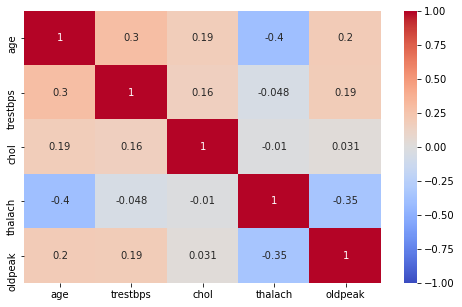

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

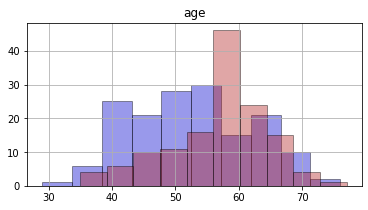

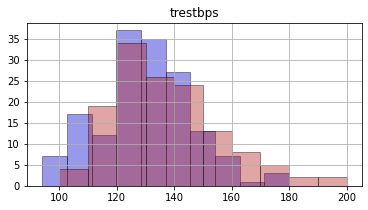

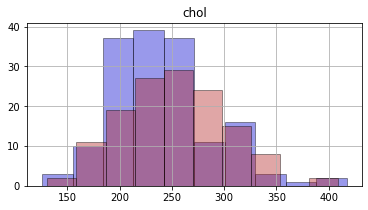

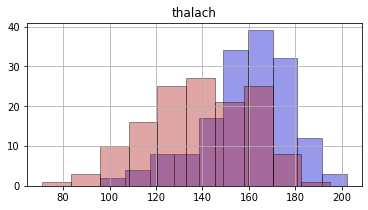

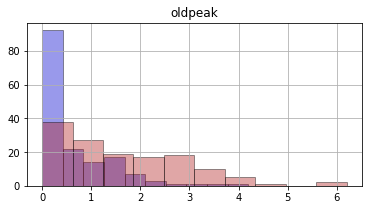

In [27]:
for i in num_cols:
    plt.figure(figsize=(6,3))
    data[data['target']=='0'][i].hist(color='mediumblue',alpha=0.4,edgecolor='black')
    data[data['target']=='1'][i].hist(color='firebrick',alpha=0.4,edgecolor='black')
    plt.title(i)
    plt.show()

In [28]:
skewness = {}
for i in num_cols:
    skewness[i] = round(data[i].skew(),2)
skew_df = pd.Series(skewness)
skew_df.sort_values(ascending=False,inplace=True)
print(skew_df)

oldpeak     1.25
trestbps    0.70
chol        0.49
age        -0.22
thalach    -0.53
dtype: float64


- Oldpeak has a right skew (a value about +1 indicates presence of skew in that variable), hence will require log transformation before we run our model 

- Oldpeak indicates the depression in ST peak induced by exercise relative to rest. There are 5 observations that have a ST depression above 4mm and show the presence of a heart disease. Let us keep this in our model for now. We will eliminate this later if it affects our ML model  

In [29]:
data[data['oldpeak']>4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,1
123,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,1
183,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0
191,51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,1
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,1


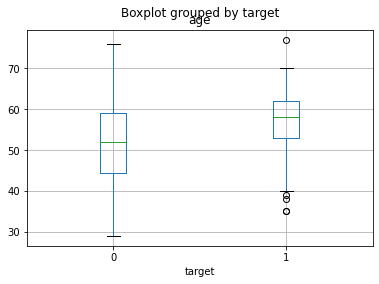

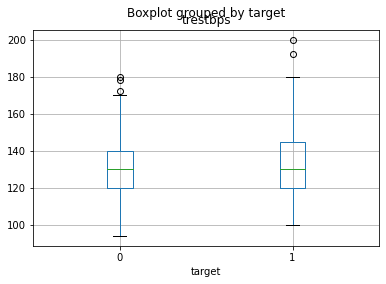

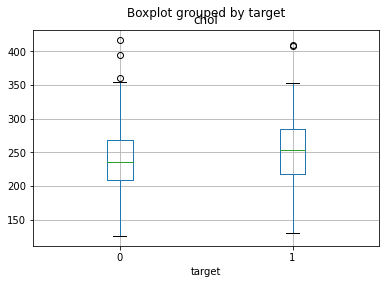

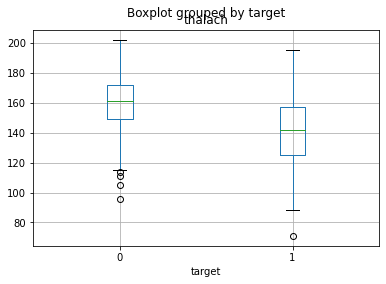

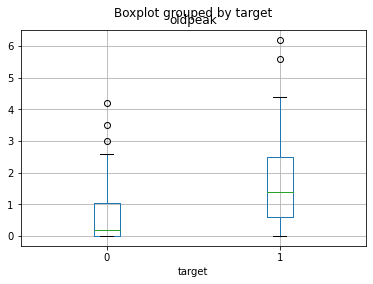

In [30]:
for i in num_cols:
    data.boxplot(column=i,by='target')

## Categorical Variables